# Coordinate Sets

(adapted from CHEM 1000 - Spring 2023 by rof. Geoffrey Hutchison, University of Pittsburgh)


Chapter 1 in [*Mathematical Methods for Chemists*](http://sites.bu.edu/straub/mathematical-methods-for-molecular-science/)

By the end of this session, you should be able to:
- Handle 2D polar and 3D spherical coordinates
- Understand area elements in 2D polar coordinates
- Understand volume eleements in 3D spherical coordinates

## X/Y Cartesian 2D Coordinates

We've already been using the x/y 2D Cartesian coordinate set to plot functions.

Beyond `sympy`, we're going to use two new modules:
- `numpy` which lets us create and handle arrays of numbers
- `matplotlib` which lets us plot things

It's a little bit more complicated. For now, you can just consider these as **demos**. We'll go into code (and make our own plots) in the next recitation period.

In [2]:
# import numpy
# the "as np" part is giving a shortcut so we can write "np.function()" instead of "numpy.function()"
# (saving typing is nice)
import numpy as np
# similarly, we import matplotlib's 'pyplot' module
# and "as plt" means we can use "plt.show" instead of "matplotlib.pyplot.show()"
import matplotlib.pyplot as plt

# insert any graphs into our notebooks directly
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

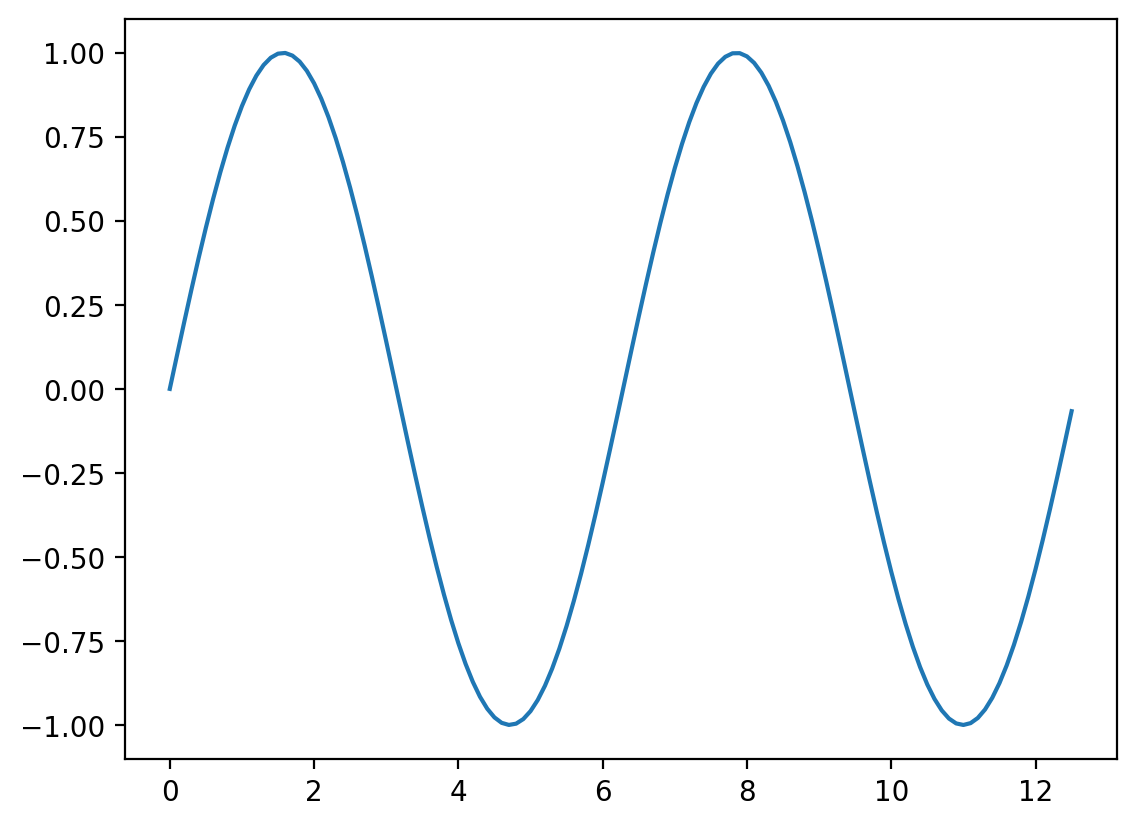

In [3]:
# once we've done that import (once) - we just need to create our x/y values
x = np.arange(0, 4*np.pi, 0.1)   # start, stop, resolution
y = np.sin(x) # creates an array with sin() of all the x values

plt.plot(x,y)
plt.show()

Sometimes, we need to get areas in the Cartesian xy system, but this is very easy - we simply multiply an increment in x ($dx$) and an increment in y ($dy$).

(Image from [*Mathematical Methods for Chemists*](http://sites.bu.edu/straub/mathematical-methods-for-molecular-science/))

<img src="./images/cartesian-area.png" width="400" />

## Polar (2D) Coordinates

Of course, not all functions work well in xy Cartesian coordinates. A function should produce one y value for any x value. Thus, a circle isn't easily represented as $y = f(x)$.

Instead, polar coordinates, use radius $r$ and angle $\theta$. (Image from [*Mathematical Methods for Chemists*](http://sites.bu.edu/straub/mathematical-methods-for-molecular-science/))

<img src="./images/cartesian-polar.png" width="343" />

As a reminder, we can interconvert x,y into r, theta:

$$
r = \sqrt{x^2 + y^2}
$$

$$
\theta = \arctan \frac{y}{x} = \tan^{-1} \frac{y}{x}
$$

In [4]:
x = 3.0
y = 1.0

r = np.sqrt(x**2 + y**2)
theta = np.arctan(y / x)

print('r =', round(r, 4), 'theta = ', round(theta, 4))

r = 3.1623 theta =  0.3218


Okay, we can't express a circle as an easy $y = f(x)$ expression. Can we do that in polar coordinates? Sure. The radius will be constant, and theta will go from $0 .. 2\pi$.

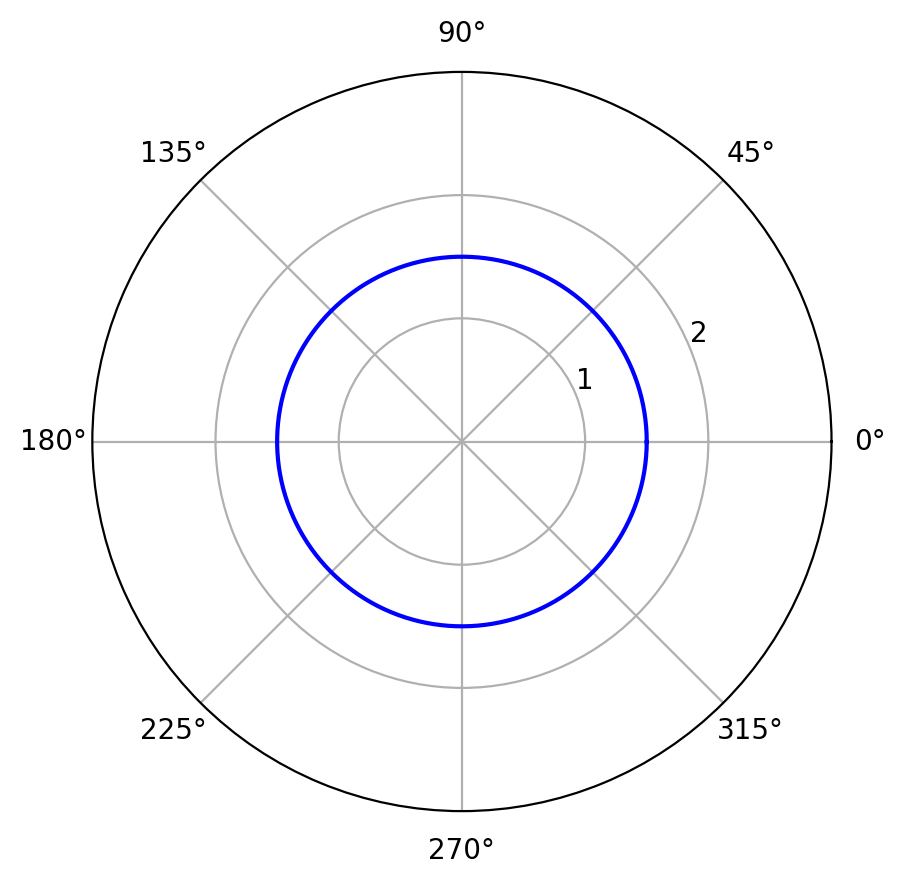

In [5]:
theta = np.arange(0, 2*np.pi, 0.01) # set up an array of radii from 0 to 2π with 0.01 rad

# create a function r(theta) = 1.5 .. a constant
r = np.full(theta.size, 1.5)

# create a new polar plot
ax = plt.subplot(111, projection='polar')
ax.plot(theta, r, color='blue')

ax.set_rmax(3)
ax.set_rticks([1, 2])  # Less radial ticks
ax.set_rlabel_position(22.5)  # Move radial labels away from plotted line
ax.grid(True)

plt.show()

Anything else? Sure - we can create spirals, etc. that are parametric functions in the XY Cartesian coordinates.

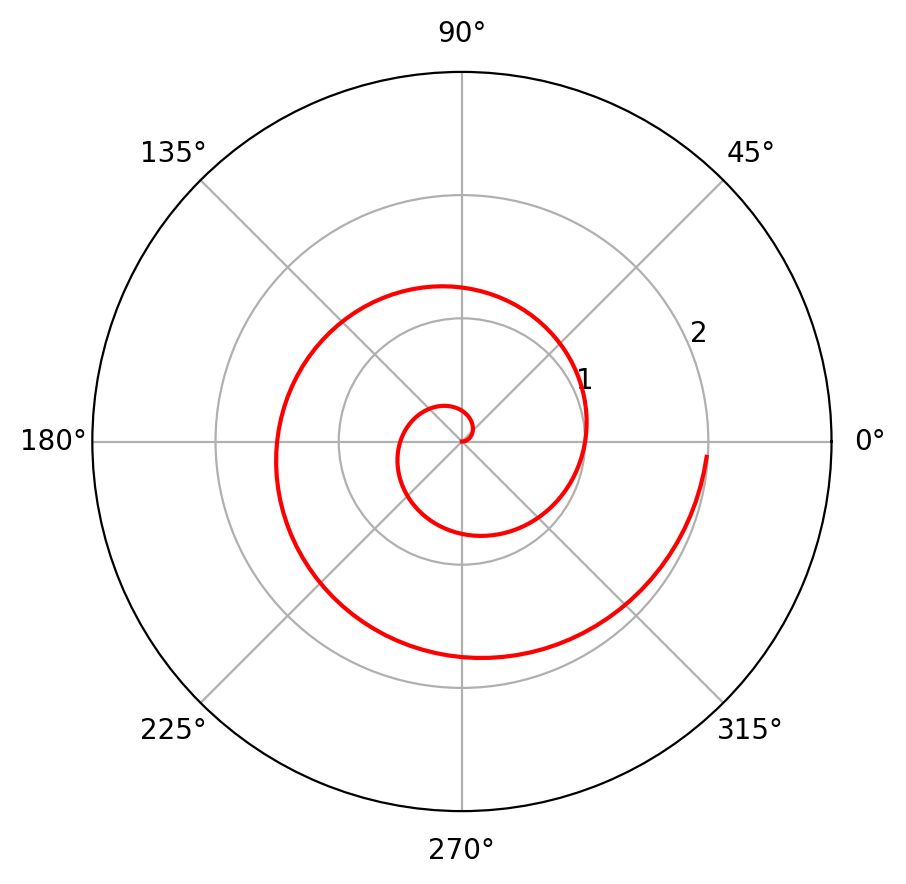

In [6]:
r = np.arange(0, 2, 0.01) # set up an array of radii from 0 to 2 with 0.01 resolution

# this is a function theta(r) = 2π * r
theta = 2 * np.pi * r # set up an array of theta angles - spiraling outward .. from 0 to 2*2pi = 4pi

# create a polar plot
ax = plt.subplot(111, projection='polar')
ax.plot(theta, r, color='red')

ax.set_rmax(3)
ax.set_rticks([1, 2])  # Less radial ticks
ax.set_rlabel_position(22.5)  # Move radial labels away from plotted line
ax.grid(True)

plt.show()

Just like with xy Cartesian, we will eventually need to consider the area of functions in polar coordinates. (Image from [*Mathematical Methods for Chemists*](http://sites.bu.edu/straub/mathematical-methods-for-molecular-science/))

<img src="./images/polar_area.png" width=375 />

Note that the area depends on the radius. Even if we sweep out the same $\Delta r$ and $\Delta \theta$ an area further out from the center is larger:

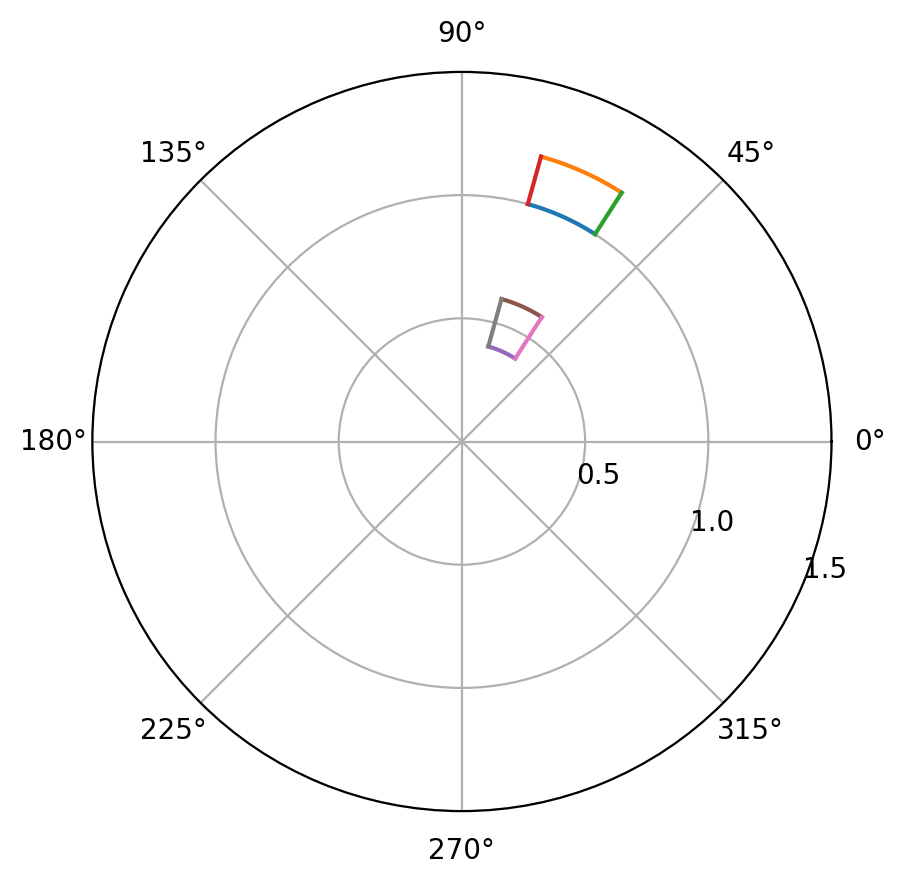

In [7]:
# create a polar plot
ax = plt.subplot(111, projection='polar')

# first arc at r = 1.0
r1 = np.full(20, 1.0)
theta1 = np.linspace(1.0, 1.3, 20)
ax.plot(theta1, r1)

# second arc at r = 1.2
r2 = np.full(20, 1.2)
theta2 = np.linspace(1.0, 1.3, 20)
ax.plot(theta2, r2)

# first radial line at theta = 1.0 radians
r3 = np.linspace(1.0, 1.2, 20)
theta3 = np.full(20, 1.0)
ax.plot(theta3, r3)

# first radial line at theta = 1.3 radians
r4 = np.linspace(1.0, 1.2, 20)
theta4 = np.full(20, 1.3)
ax.plot(theta4, r4)

# smaller box
# goes from r = 0.4-> 0.6
# sweeps out theta = 1.0-1.3 radians
r5 = np.full(20, 0.4)
r6 = np.full(20, 0.6)
r7 = np.linspace(0.4, 0.6, 20)
r8 = np.linspace(0.4, 0.6, 20)
ax.plot(theta1, r5)
ax.plot(theta2, r6)
ax.plot(theta3, r7)
ax.plot(theta4, r8)

ax.set_rmax(1.5)
ax.set_rticks([0.5, 1, 1.5])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

plt.show()

Thus the area element will be $r dr d\theta$. While it's not precisely rectangular, the increments are very small and it's a reasonable approximation.

## 3D Cartesian Coordinates

Of course there are many times when we need to express functions like:

$$ z = f(x,y) $$

These are a standard extension of 2D Cartesian coordinates, and so the volume is simply defined as that of a rectangular solid.

<img src="./images/cartesian-volume.png" width="360" />

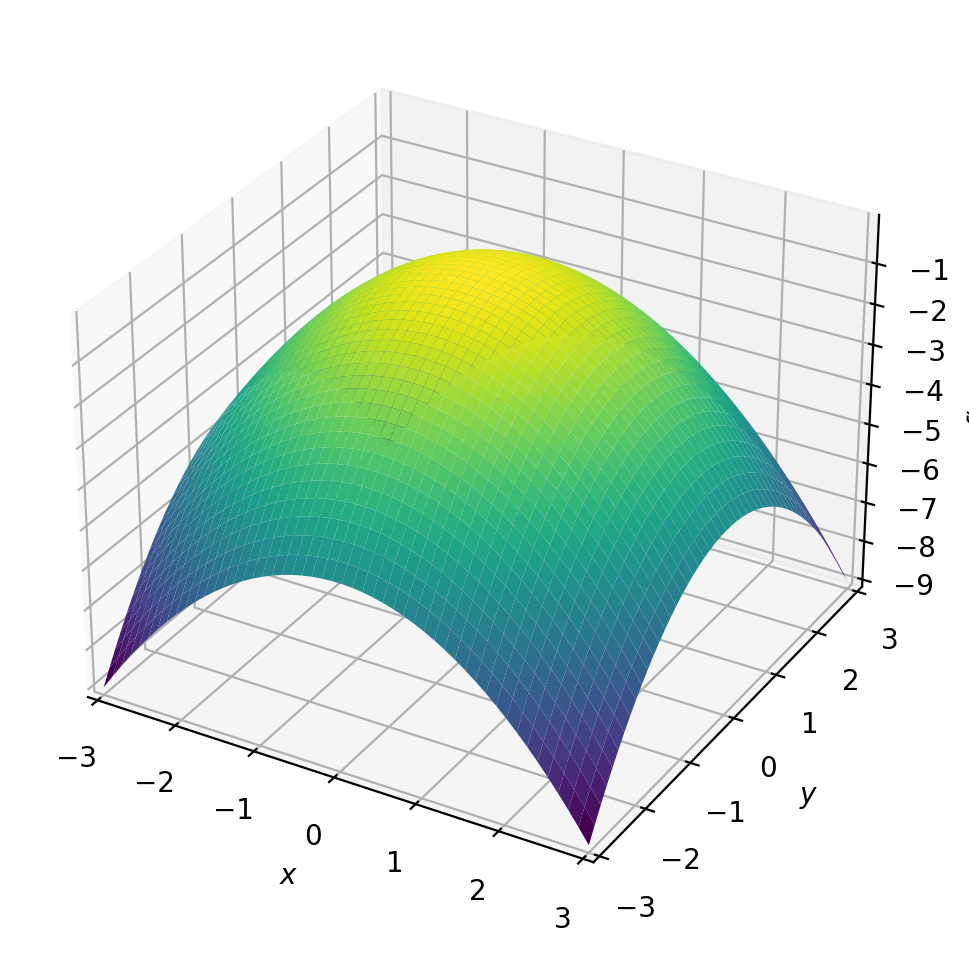

In [9]:
from sympy import symbols
from sympy.plotting import plot3d
x, y = symbols('x y')

plot3d(-0.5 * (x**2 + y**2), (x, -3, 3), (y, -3, 3))

## 3D Spherical Coordinates

Much like two dimensions we sometimes need to use spherical coordinates — atoms are spherical, after all.

<div class="alert alert-block alert-danger">

**WARNING** Some math courses use a different [convention](https://en.wikipedia.org/wiki/Spherical_coordinate_system#Conventions) than chemistry and physics.
    
- Physics and chemistry use $(r, \theta, \varphi)$ where $\theta$ is the angle down from the z-axis (e.g., latitude)
- Some math courses use $\theta$ as the angle in the XY 2D plane.

</div>

(Image from [*Mathematical Methods for Chemists*](http://sites.bu.edu/straub/mathematical-methods-for-molecular-science/))

<img src="./images/spherical.png" width="330" />

Where:
- $r$ is the radius, from 0 to $\infty$
- $\theta$ is the angle down from the z-axis
  - e.g., think of N/S latitude on the Earth's surface) from 0° at the N pole to 90° (π/2) at the equator and 180° (π) at the S pole
- $\varphi$ is the angle in the $xy$ plane
  - e.g., think of E/W longitude on the Earth), from 0 to 360° / 0..2π

We can interconvert xyz and $r\theta\varphi$

$$x = r\sin \theta \cos \varphi$$
$$y = r\sin \theta \sin \varphi$$
$$z = r \cos \theta$$

Or vice-versa:

$$
\begin{array}{l}r=\sqrt{x^{2}+y^{2}+z^{2}} \\ \theta=\arccos \left(\frac{z}{r}\right)=\cos ^{-1}\left(\frac{z}{r}\right) \\ \varphi=\tan ^{-1}\left(\frac{y}{x}\right)\end{array}
$$

The code below might look a little complicated. That's okay. I've added comments for the different sections and each line.

You don't need to understand all of it - it's intended to plot the function:

$$ r = |\cos(\theta^2) | $$

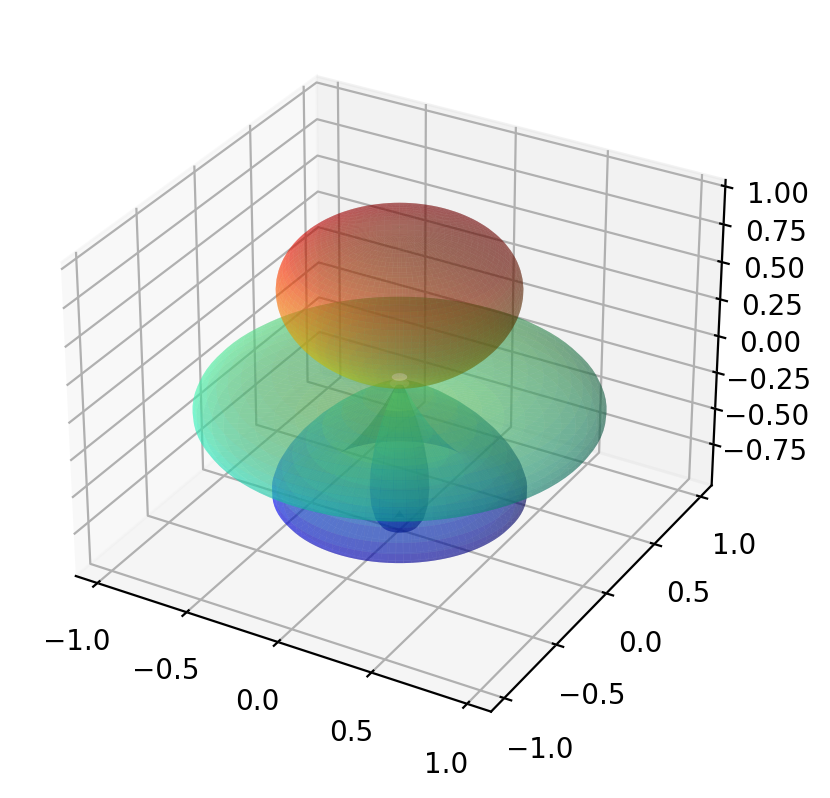

In [10]:
# import some matplotlib modules for 3D and color scales
import mpl_toolkits.mplot3d.axes3d as axes3d
import matplotlib.colors as mcolors
cmap = plt.get_cmap('jet') # pick a red-to-blue color map
fig = plt.figure() # create a figure
ax = fig.add_subplot(1,1,1, projection='3d') # set up some axes for a 3D projection

# We now set up the grid for evaluating our function
#  particularly the angle portion of the spherical coordinates
theta = np.linspace(0, np.pi, 100)
phi = np.linspace(0, 2*np.pi, 100)
THETA, PHI = np.meshgrid(theta, phi)

# here's the function to plot
R = np.abs(np.cos(THETA**2))

# now convert R(phi, theta) to x, y, z coordinates to plot
X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
Z = R * np.cos(THETA)

# set up some colors based on the Z range .. from red to blue
norm = mcolors.Normalize(vmin=Z.min(), vmax=Z.max())
# plot the surface
plot = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=cmap(norm(Z)),
    linewidth=0, antialiased=True, alpha=0.4) # no lines, smooth graphics, semi-transparent

plt.show()

The volume element in spherical coordinates is a bit tricky, since the distances depend on the radius and angles:
(Image from [*Mathematical Methods for Chemists*](http://sites.bu.edu/straub/mathematical-methods-for-molecular-science/))

$$ dV = r^2 dr \sin \theta d\theta d\phi$$

<img src="./images/spherical-volume.png" width="414" />


-------
This notebook is adapted from Prof. Geoffrey Hutchison, University of Pittsburgh
https://github.com/ghutchis/chem1000

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a>